In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv("C:\\Users\\steph\\Downloads\\train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [7]:
df.duplicated().sum() # there are no duplicated columns.

0

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

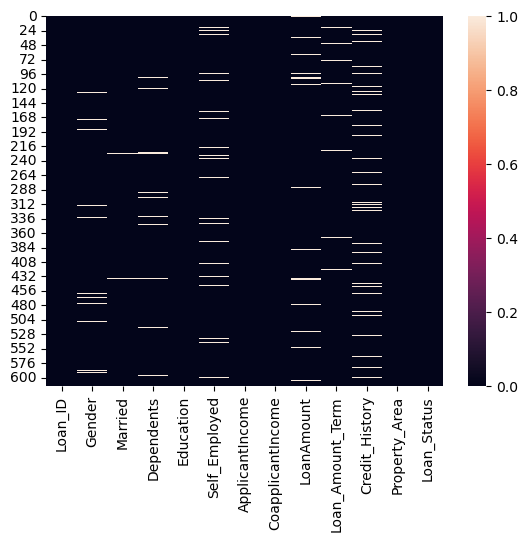

In [9]:
sns.heatmap(df.isna())

In [10]:
num_df=df.select_dtypes(include='number')
cat_df=df.select_dtypes(include='object')

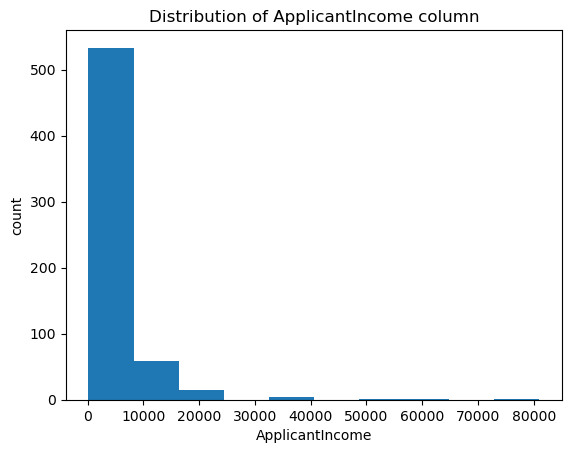

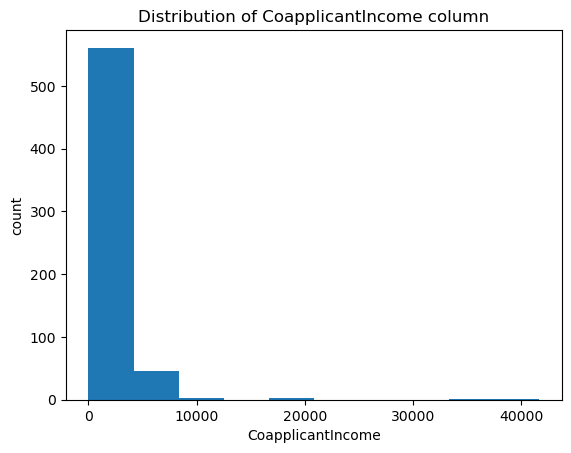

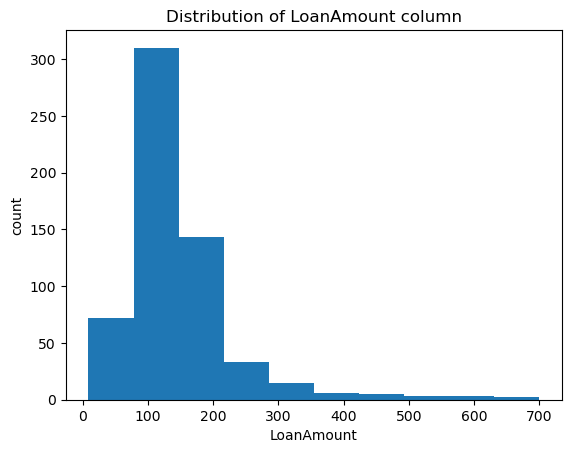

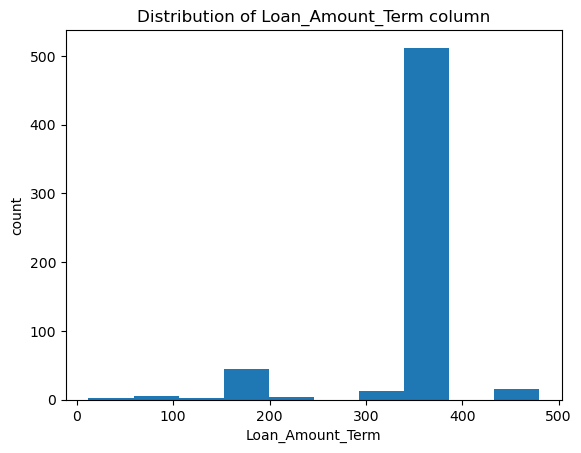

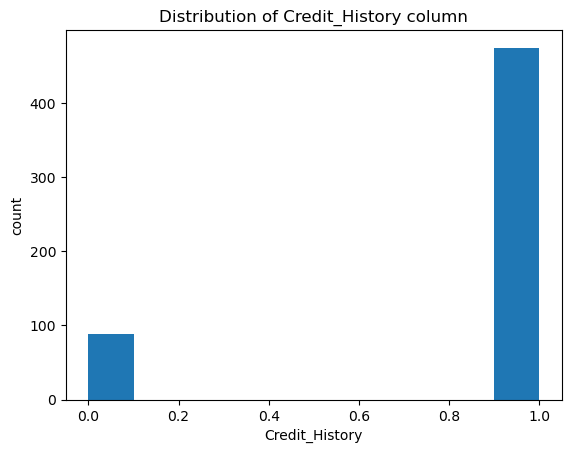

In [11]:
for col in num_df:
    plt.hist(num_df[col])
    plt.title("Distribution of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [12]:
num_df.columns.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
cat_df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
num_df.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [15]:
for col in num_df:
    num_df[col]= num_df[col].fillna(num_df[col].median())

In [16]:
num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [17]:
cat_df.isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [18]:
for col in cat_df:
    cat_df[col]= cat_df[col].fillna(cat_df[col].mode()[0])

In [19]:
cat_df.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [20]:
df = pd.concat([num_df,cat_df], axis=1)

In [21]:
df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
print(df["Dependents"].unique())

['0' '1' '2' '3+']


In [23]:
df["Dependents"].replace('3+',3,inplace=True)
df.tail()

C:\Users\steph\AppData\Local\Temp\ipykernel_10292\413252989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dependents"].replace('3+',3,inplace=True)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
609,2900,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y
610,4106,0.0,40.0,180.0,1.0,LP002979,Male,Yes,3,Graduate,No,Rural,Y
611,8072,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,7583,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y
613,4583,0.0,133.0,360.0,0.0,LP002990,Female,No,0,Graduate,Yes,Semiurban,N


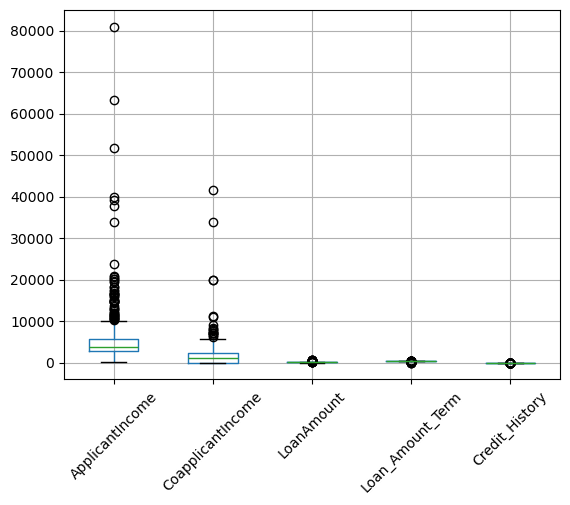

In [24]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [25]:
df= pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Property_Area'],dtype=int,drop_first=True)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,LP001002,0,Y,1,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,LP001003,1,N,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,LP001005,0,Y,1,1,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,LP001006,0,Y,1,1,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,LP001008,0,Y,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,LP002978,0,Y,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,LP002979,3,Y,1,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,LP002983,1,Y,1,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,LP002984,2,Y,1,1,0,0,0,1


In [26]:
### Scaling


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
std_scalar= StandardScaler()
df['LoanAmount'] = std_scalar.fit_transform(df[['LoanAmount']])
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,-0.211241,360.0,1.0,LP001002,0,Y,1,0,0,0,0,1
1,4583,1508.0,-0.211241,360.0,1.0,LP001003,1,N,1,1,0,0,0,0
2,3000,0.0,-0.948996,360.0,1.0,LP001005,0,Y,1,1,0,1,0,1
3,2583,2358.0,-0.306435,360.0,1.0,LP001006,0,Y,1,1,1,0,0,1
4,6000,0.0,-0.056551,360.0,1.0,LP001008,0,Y,1,0,0,0,0,1


In [29]:
min_max_scalar= MinMaxScaler(feature_range=(0,1))
df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']] = min_max_scalar.fit_transform(df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']])
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,-0.211241,0.743590,1.0,LP001002,0,Y,1,0,0,0,0,1
1,0.054830,0.036192,-0.211241,0.743590,1.0,LP001003,1,N,1,1,0,0,0,0
2,0.035250,0.000000,-0.948996,0.743590,1.0,LP001005,0,Y,1,1,0,1,0,1
3,0.030093,0.056592,-0.306435,0.743590,1.0,LP001006,0,Y,1,1,1,0,0,1
4,0.072356,0.000000,-0.056551,0.743590,1.0,LP001008,0,Y,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,-0.889500,0.743590,1.0,LP002978,0,Y,0,0,0,0,0,0
610,0.048930,0.000000,-1.258378,0.358974,1.0,LP002979,3,Y,1,1,0,0,0,0
611,0.097984,0.005760,1.276168,0.743590,1.0,LP002983,1,Y,1,1,0,0,0,1
612,0.091936,0.000000,0.490816,0.743590,1.0,LP002984,2,Y,1,1,0,0,0,1


In [30]:
y=df['Loan_Status'] 
X=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents','Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [32]:
# Logistic Regression

In [33]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7642276422764228


In [36]:
# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [39]:
# Naive bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7804878048780488


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [45]:
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7560975609756098


In [46]:
# Import test data
test_df=pd.read_csv("C:\\Users\\steph\\Downloads\\test_lAUu6dG.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
test_df.shape

(367, 12)

In [48]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [49]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
num_testdf=test_df.select_dtypes(include='number')
cat_testdf=test_df.select_dtypes(include='object')

In [51]:
for col in num_testdf:
    num_testdf[col]=num_testdf[col].fillna(num_testdf[col].median())

In [52]:
num_testdf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [53]:
for col in cat_testdf:
    cat_testdf[col]=cat_testdf[col].fillna(cat_testdf[col].mode()[0])

In [54]:
cat_testdf.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [55]:
test_df=pd.concat([num_testdf,cat_testdf],axis=1)
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5720,0,110.0,360.0,1.0,LP001015,Male,Yes,0,Graduate,No,Urban
1,3076,1500,126.0,360.0,1.0,LP001022,Male,Yes,1,Graduate,No,Urban
2,5000,1800,208.0,360.0,1.0,LP001031,Male,Yes,2,Graduate,No,Urban
3,2340,2546,100.0,360.0,1.0,LP001035,Male,Yes,2,Graduate,No,Urban
4,3276,0,78.0,360.0,1.0,LP001051,Male,No,0,Not Graduate,No,Urban


In [56]:
print(test_df["Dependents"].unique())

['0' '1' '2' '3+']


In [57]:
test_df["Dependents"].replace('3+',3,inplace=True)
test_df.tail()

C:\Users\steph\AppData\Local\Temp\ipykernel_10292\1033247858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Dependents"].replace('3+',3,inplace=True)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
362,4009,1777,113.0,360.0,1.0,LP002971,Male,Yes,3,Not Graduate,Yes,Urban
363,4158,709,115.0,360.0,1.0,LP002975,Male,Yes,0,Graduate,No,Urban
364,3250,1993,126.0,360.0,1.0,LP002980,Male,No,0,Graduate,No,Semiurban
365,5000,2393,158.0,360.0,1.0,LP002986,Male,Yes,0,Graduate,No,Rural
366,9200,0,98.0,180.0,1.0,LP002989,Male,No,0,Graduate,Yes,Rural


In [58]:
test_df= pd.get_dummies(test_df,columns=['Gender','Married','Education','Self_Employed','Property_Area'],dtype=int,drop_first=True)
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,LP001015,0,1,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,LP001022,1,1,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,LP001031,2,1,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,LP001035,2,1,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,LP001051,0,1,0,1,0,0,1


In [59]:
std_scalar= StandardScaler()
test_df['LoanAmount'] = std_scalar.fit_transform(test_df[['LoanAmount']])
test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,-0.426780,360.0,1.0,LP001015,0,1,1,0,0,0,1
1,3076,1500,-0.163953,360.0,1.0,LP001022,1,1,1,0,0,0,1
2,5000,1800,1.183033,360.0,1.0,LP001031,2,1,1,0,0,0,1
3,2340,2546,-0.591047,360.0,1.0,LP001035,2,1,1,0,0,0,1
4,3276,0,-0.952433,360.0,1.0,LP001051,0,1,0,1,0,0,1


In [60]:
min_max_scalar= MinMaxScaler(feature_range=(0,1))
test_df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']] = min_max_scalar.fit_transform(test_df[['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']])
test_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,-0.426780,0.746835,1.0,LP001015,0,1,1,0,0,0,1
1,0.042411,0.062500,-0.163953,0.746835,1.0,LP001022,1,1,1,0,0,0,1
2,0.068938,0.075000,1.183033,0.746835,1.0,LP001031,2,1,1,0,0,0,1
3,0.032263,0.106083,-0.591047,0.746835,1.0,LP001035,2,1,1,0,0,0,1
4,0.045168,0.000000,-0.952433,0.746835,1.0,LP001051,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.055274,0.074042,-0.377500,0.746835,1.0,LP002971,3,1,1,1,1,0,1
363,0.057329,0.029542,-0.344647,0.746835,1.0,LP002975,0,1,1,0,0,0,1
364,0.044810,0.083042,-0.163953,0.746835,1.0,LP002980,0,1,0,0,0,1,0
365,0.068938,0.099708,0.361700,0.746835,1.0,LP002986,0,1,1,0,0,0,0


In [162]:
X_test=test_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents','Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']]

In [164]:
test_df['Loan_Status'] =rf_classifier.predict(X_test)

In [166]:
test_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Dependents,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.078865,0.000000,-0.426780,0.746835,1.0,LP001015,0,1,1,0,0,0,1,Y
1,0.042411,0.062500,-0.163953,0.746835,1.0,LP001022,1,1,1,0,0,0,1,Y
2,0.068938,0.075000,1.183033,0.746835,1.0,LP001031,2,1,1,0,0,0,1,Y
3,0.032263,0.106083,-0.591047,0.746835,1.0,LP001035,2,1,1,0,0,0,1,Y
4,0.045168,0.000000,-0.952433,0.746835,1.0,LP001051,0,1,0,1,0,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.055274,0.074042,-0.377500,0.746835,1.0,LP002971,3,1,1,1,1,0,1,Y
363,0.057329,0.029542,-0.344647,0.746835,1.0,LP002975,0,1,1,0,0,0,1,Y
364,0.044810,0.083042,-0.163953,0.746835,1.0,LP002980,0,1,0,0,0,1,0,Y
365,0.068938,0.099708,0.361700,0.746835,1.0,LP002986,0,1,1,0,0,0,0,Y


In [168]:
test_df[['Loan_ID', 'Loan_Status']].to_csv('C:\\Users\\steph\\Downloads\\loan_predictions.csv', index=False)